## Algorithm to range correct the CNR values

In [3]:
import netCDF4 as nc
import os
import xarray as xr
from source2 import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [1]:
direct_names = ['/Users/jenifervivar/Documents/GitHub/NOAA_PBLH/Data/cnr.csv',
'/Users/jenifervivar/Documents/GitHub/NOAA_PBLH/Data/relative_beta.csv',
'/Users/jenifervivar/Documents/GitHub/NOAA_PBLH/Data/spectral_width.csv',
'/Users/jenifervivar/Documents/GitHub/NOAA_PBLH/Data/vertical_wind.csv',
'/Users/jenifervivar/Documents/GitHub/NOAA_PBLH/Data/atmospheric_structures.csv']

In [115]:
k =0
#DF = [dfCnr, dfBeta, dfSpectral, dfWind, dfatm_pbl]
for direct in direct_names:
    
    if k == 0:    
        dfCnr = pd.read_csv(direct)
        dfCnr.rename(columns={'Unnamed: 0': 'time'}, inplace = True)
        dfCnr['time'] = pd.to_datetime(dfCnr['time'])
        dfCnr.set_index('time', inplace = True)
    if k ==1:
        dfBeta = pd.read_csv(direct)
        dfBeta.rename(columns={'Unnamed: 0': 'time'}, inplace = True)
        dfBeta['time'] = pd.to_datetime(dfBeta['time'])
        dfBeta.set_index('time', inplace = True)
    if k == 2:
        dfSpectral = pd.read_csv(direct)
        dfSpectral.rename(columns={'Unnamed: 0': 'time'}, inplace = True)
        dfSpectral['time'] = pd.to_datetime(dfSpectral['time'])
        dfSpectral.set_index('time', inplace = True)
    if k ==3:
        dfWind = pd.read_csv(direct)
        dfWind.rename(columns={'Unnamed: 0': 'time'}, inplace = True)
        dfWind['time'] = pd.to_datetime(dfWind['time'])
        dfWind.set_index('time', inplace = True)
    if k ==4:
        dfatm_pbl = pd.read_csv(direct)
        dfatm_pbl.rename(columns={'Unnamed: 0': 'time'}, inplace = True)
        dfatm_pbl['time'] = pd.to_datetime(dfatm_pbl['time'])
        dfatm_pbl.set_index('time', inplace = True)
    k+=1
   

In [118]:
dfCnr.index

DatetimeIndex(['2021-07-17 00:00:00+00:00', '2021-07-17 00:30:00+00:00',
               '2021-07-17 01:00:00+00:00', '2021-07-17 01:30:00+00:00',
               '2021-07-17 02:00:00+00:00', '2021-07-17 02:30:00+00:00',
               '2021-07-17 03:00:00+00:00', '2021-07-17 03:30:00+00:00',
               '2021-07-17 04:00:00+00:00', '2021-07-17 04:30:00+00:00',
               ...
               '2021-10-13 19:00:00+00:00', '2021-10-13 19:30:00+00:00',
               '2021-10-13 20:00:00+00:00', '2021-10-13 20:30:00+00:00',
               '2021-10-13 21:00:00+00:00', '2021-10-13 21:30:00+00:00',
               '2021-10-13 22:00:00+00:00', '2021-10-13 22:30:00+00:00',
               '2021-10-13 23:00:00+00:00', '2021-10-13 23:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=4145, freq=None)

In [30]:
dfCnr_T = dfCnr.T
dfCnr.index = dfCnr.index.astype(int)
dfCnr_T.reset_index(inplace= True)
dfCnr_T.head()

time,index,2021-07-17 00:00:00+00:00,2021-07-17 00:30:00+00:00,2021-07-17 01:00:00+00:00,2021-07-17 01:30:00+00:00,2021-07-17 02:00:00+00:00,2021-07-17 02:30:00+00:00,2021-07-17 03:00:00+00:00,2021-07-17 03:30:00+00:00,2021-07-17 04:00:00+00:00,...,2021-10-13 19:00:00+00:00,2021-10-13 19:30:00+00:00,2021-10-13 20:00:00+00:00,2021-10-13 20:30:00+00:00,2021-10-13 21:00:00+00:00,2021-10-13 21:30:00+00:00,2021-10-13 22:00:00+00:00,2021-10-13 22:30:00+00:00,2021-10-13 23:00:00+00:00,2021-10-13 23:30:00+00:00
0,5100,-32.894347,-32.892042,-32.861097,-33.041125,-32.887069,-32.871625,-32.905014,-32.910236,-33.023292,...,-32.896583,-32.973472,-32.985139,-32.941833,-32.965931,-32.930597,-32.914478,-33.000014,-32.994072,-32.862716
1,5000,-32.912306,-32.883556,-32.948556,-32.960986,-32.908097,-32.833347,-32.877556,-32.845306,-32.935639,...,-32.879125,-32.951222,-32.949181,-32.955722,-32.947042,-32.984444,-32.890445,-32.939694,-32.937799,-32.941045
2,4900,-32.893236,-32.845875,-32.869500,-32.942194,-32.747333,-32.888403,-32.933500,-32.839083,-32.865819,...,-32.820806,-33.011764,-32.905111,-32.959583,-33.055778,-32.949708,-32.908581,-32.926236,-32.836000,-32.936769
3,4800,-32.799486,-32.887806,-32.858181,-32.915458,-32.865333,-32.836639,-32.883750,-32.915403,-32.823597,...,-32.905278,-32.955875,-32.862417,-32.859222,-32.996458,-32.999403,-32.931641,-32.928792,-32.907237,-32.962354
4,4700,-32.592181,-32.608278,-32.909847,-32.779931,-32.828847,-32.864444,-32.855486,-32.683097,-32.821917,...,-32.949750,-32.856722,-32.841583,-32.889819,-32.995000,-32.946583,-32.893658,-32.949333,-32.916101,-32.958468


In [31]:
dfCnr_T.values

array([['5100', -32.89434722222222, -32.892041666666664, ...,
        -33.00001388888889, -32.99407194244604, -32.862715877437324],
       ['5000', -32.912305555555555, -32.88355555555555, ...,
        -32.93969444444445, -32.93779856115108, -32.941044568245125],
       ['4900', -32.893236111111115, -32.845875, ..., -32.92623611111111,
        -32.836, -32.93676880222841],
       ...,
       ['400', -13.237972222222222, -12.406708333333333, ...,
        -6.717444444444445, -8.04451798561151, -6.939373259052926],
       ['300', -14.734125, -13.555611111111112, ..., -8.705902777777778,
        -9.41041726618705, -9.215236768802228],
       ['200', -15.868083333333336, -15.222236111111112, ...,
        -10.79776388888889, -10.744028776978418, -10.81759052924791]],
      dtype=object)

<AxesSubplot:>

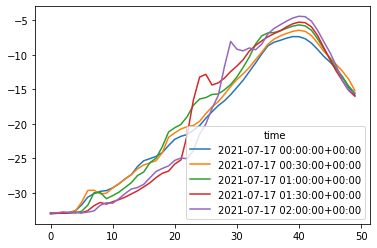

In [137]:
(dfCnr_T[dfCnr.T.columns[:5]]).plot()

In [34]:
dfCnr_T[dfCnr_.columns[1:5]].values

array([[-32.89434722, -32.89204167, -32.86109722, -33.041125  ],
       [-32.91230556, -32.88355556, -32.94855556, -32.96098611],
       [-32.89323611, -32.845875  , -32.8695    , -32.94219444],
       [-32.79948611, -32.88780556, -32.85818056, -32.91545833],
       [-32.59218056, -32.60827778, -32.90984722, -32.77993056],
       [-31.74768056, -31.36306944, -32.66013889, -32.86836111],
       [-30.61320833, -29.63566667, -31.77193056, -32.56261111],
       [-30.11123611, -29.61465278, -29.97495833, -31.84829167],
       [-29.76902778, -30.12377778, -29.93580556, -31.38195833],
       [-29.66363889, -30.05009722, -30.83595833, -31.62159722],
       [-29.26631944, -29.26920833, -30.39201389, -31.27808333],
       [-28.69991667, -28.671375  , -29.89827778, -30.97797222],
       [-27.97152778, -28.01213889, -29.21502778, -30.61761111],
       [-27.36283333, -27.35530556, -28.53020833, -30.15983333],
       [-26.19305556, -26.50658333, -27.49276389, -29.69323611],
       [-25.35004167, -25

In [38]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

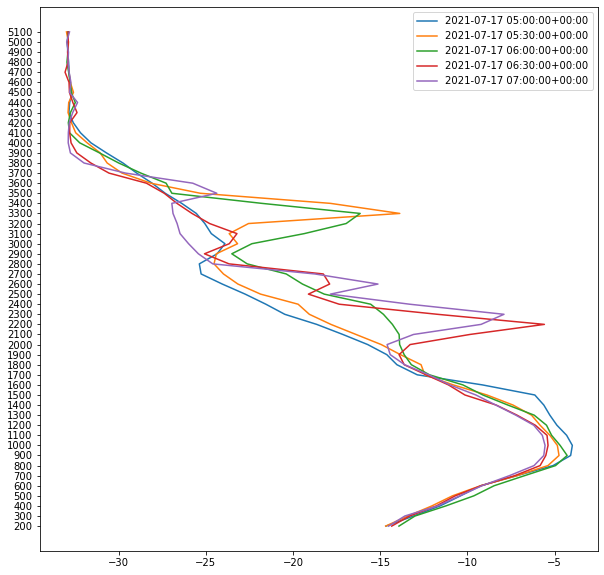

In [139]:
plt.figure(figsize=(10,10))
plt.plot(dfCnr_T[dfCnr.T.columns[10:15]].values[::-1],dfCnr.T.index[::-1], label=dfCnr.T.columns[10:15])
plt.legend()
plt.show()

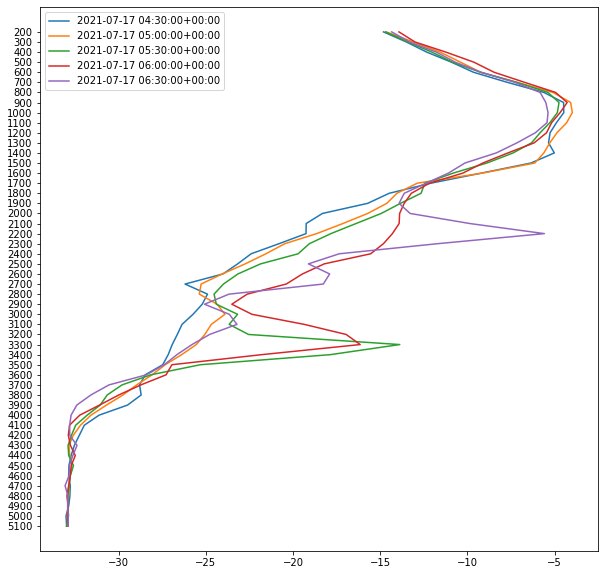

In [65]:
plt.figure(figsize=(10,10))
plt.plot(dfCnr_T[dfCnr_T.columns[10:15]].values,dfCnr_T['index'], label=dfCnr_T.columns[10:15])
plt.legend()
plt.show()

The simplest option to normalize these values is to use the so-called model-driven ‘range correction’, which accounts for the fact that beams do not travel the same distance from sensor to target (equation 1).


$$\hat{I} = I(\frac{R}{R_s})^{f}$$


where $\hat{I}$ is the normalized intensity equivalent to the intensity that would have been recorded if all points had been recorded with a constant range, $I$ is the observed intensity, $R$ is the distance between the laser instrument and the returns, $R_s$ is an arbitrary reference distance and the exponent $f$ represents the rate of energy attenuation sustained by the pulse as it travels through a medium back and forth from a target. 
The CNR in dB, is the signal intensity on a logarithmic scale.

The value of f depends on the surface type and the theory states that a value of 2 corresponds to homogeneous targets filling the full pulse footprint, a value of 3 corresponds to linear objects (e.g. power line wires), and a value of 4 corresponds to individual large scatterers (Kaasalainen et al., 2007). This value is therefore likely to vary between 2 and 3 in a vegetated context (Korpela, 2008; Gatziolis, 2013).

In [107]:
for db in dfCnr.T.iterrows():
    print(db[1].values,db[0], type(db[1]))
    break

[-32.89434722 -32.89204167 -32.86109722 ... -33.00001389 -32.99407194
 -32.86271588] 5100 <class 'pandas.core.series.Series'>


In [108]:
def I(array, f=2):
    r_o = int(array[0])
    if r_o != 200:
        c = ((r_o-200)/r_o)**f
        return (array[1].values)*c
    else:
        return array[1].values

In [128]:
def range_corrector(df_):
    df = df_.T
    corrected = []
    for col in df.iterrows():
        new = I(col)
        corrected.append(new)
    corrected = np.array(corrected)
    col = df_.index
    index = np.flip(np.arange(200, 5200, 100))
    
    return pd.DataFrame(corrected, index = index, columns = col)

In [129]:
corrected_cnr = range_corrector(dfCnr)
corrected_cnr

time,2021-07-17 00:00:00+00:00,2021-07-17 00:30:00+00:00,2021-07-17 01:00:00+00:00,2021-07-17 01:30:00+00:00,2021-07-17 02:00:00+00:00,2021-07-17 02:30:00+00:00,2021-07-17 03:00:00+00:00,2021-07-17 03:30:00+00:00,2021-07-17 04:00:00+00:00,2021-07-17 04:30:00+00:00,...,2021-10-13 19:00:00+00:00,2021-10-13 19:30:00+00:00,2021-10-13 20:00:00+00:00,2021-10-13 20:30:00+00:00,2021-10-13 21:00:00+00:00,2021-10-13 21:30:00+00:00,2021-10-13 22:00:00+00:00,2021-10-13 22:30:00+00:00,2021-10-13 23:00:00+00:00,2021-10-13 23:30:00+00:00
5100,-30.364986,-30.362857,-30.334292,-30.500477,-30.358267,-30.344011,-30.374832,-30.379653,-30.484015,-30.447581,...,-30.367050,-30.438026,-30.448796,-30.408820,-30.431065,-30.398448,-30.383569,-30.462527,-30.457042,-30.335787
5000,-30.331981,-30.305485,-30.365389,-30.376845,-30.328102,-30.259213,-30.299955,-30.270234,-30.353485,-30.430134,...,-30.301402,-30.367846,-30.365965,-30.371994,-30.363994,-30.398464,-30.311834,-30.357222,-30.355475,-30.358467
4900,-30.262873,-30.219299,-30.241035,-30.307917,-30.128638,-30.258426,-30.299917,-30.213051,-30.237649,-30.237698,...,-30.196235,-30.371923,-30.273799,-30.323915,-30.412417,-30.314830,-30.276991,-30.293234,-30.210214,-30.302925
4800,-30.123139,-30.204252,-30.177044,-30.229648,-30.183613,-30.157260,-30.200527,-30.229597,-30.145283,-30.121258,...,-30.220299,-30.266767,-30.180935,-30.178001,-30.304039,-30.306743,-30.244511,-30.241894,-30.222098,-30.272717
4700,-29.877395,-29.892151,-30.168601,-30.049506,-30.094348,-30.126981,-30.118768,-29.960739,-30.087995,-30.046129,...,-30.205181,-30.119902,-30.106024,-30.150242,-30.246661,-30.202278,-30.153761,-30.204799,-30.174334,-30.213172
4600,-29.047027,-28.695133,-29.881866,-30.072376,-30.101158,-30.125874,-30.120931,-29.936838,-30.120639,-30.074243,...,-30.143448,-30.077268,-30.082186,-30.110994,-30.092187,-30.266621,-30.150353,-30.107372,-30.017900,-30.075787
4500,-27.952505,-27.059925,-29.010518,-29.732478,-29.931810,-29.973051,-30.012884,-29.999924,-30.028508,-29.995976,...,-30.053403,-30.116900,-29.985454,-29.987293,-30.102468,-30.062064,-30.091480,-29.995168,-29.989988,-29.990400
4400,-27.436064,-26.983599,-27.311894,-29.018795,-29.708313,-29.917031,-29.852832,-29.894353,-29.953427,-29.819317,...,-30.104438,-29.905540,-29.936191,-30.064929,-30.017942,-29.995859,-29.990246,-29.882508,-30.072639,-30.034781
4300,-27.064216,-27.386734,-27.215841,-28.530596,-28.907700,-29.835894,-29.498161,-29.496595,-29.681694,-29.583808,...,-29.956772,-29.952996,-29.830830,-29.885202,-30.007444,-29.977164,-30.033057,-29.979929,-29.920048,-29.998837
4200,-26.905795,-27.256324,-27.969123,-28.681721,-28.507546,-28.560632,-29.182212,-29.122348,-29.268884,-29.258045,...,-29.782401,-29.845477,-29.813177,-29.847380,-29.970345,-29.832918,-29.824996,-29.833396,-29.871665,-29.896424


In [134]:
dfCnr.T.index

Index(['5100', '5000', '4900', '4800', '4700', '4600', '4500', '4400', '4300',
       '4200', '4100', '4000', '3900', '3800', '3700', '3600', '3500', '3400',
       '3300', '3200', '3100', '3000', '2900', '2800', '2700', '2600', '2500',
       '2400', '2300', '2200', '2100', '2000', '1900', '1800', '1700', '1600',
       '1500', '1400', '1300', '1200', '1100', '1000', '900', '800', '700',
       '600', '500', '400', '300', '200'],
      dtype='object')

In [131]:
corrected_cnr.index

Int64Index([5100, 5000, 4900, 4800, 4700, 4600, 4500, 4400, 4300, 4200, 4100,
            4000, 3900, 3800, 3700, 3600, 3500, 3400, 3300, 3200, 3100, 3000,
            2900, 2800, 2700, 2600, 2500, 2400, 2300, 2200, 2100, 2000, 1900,
            1800, 1700, 1600, 1500, 1400, 1300, 1200, 1100, 1000,  900,  800,
             700,  600,  500,  400,  300,  200],
           dtype='int64')

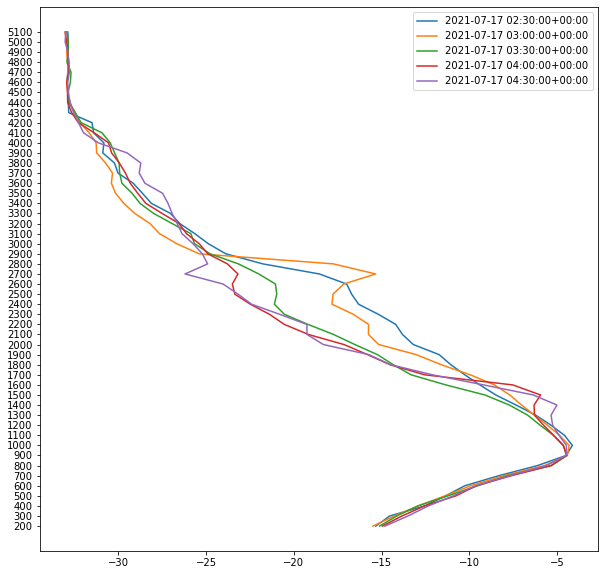

In [143]:
plt.figure(figsize=(10,10))
plt.plot(dfCnr_T[dfCnr.T.columns[5:10]].values[::-1],dfCnr.T.index[::-1], label=dfCnr.T.columns[5:10])
plt.legend()
plt.show()

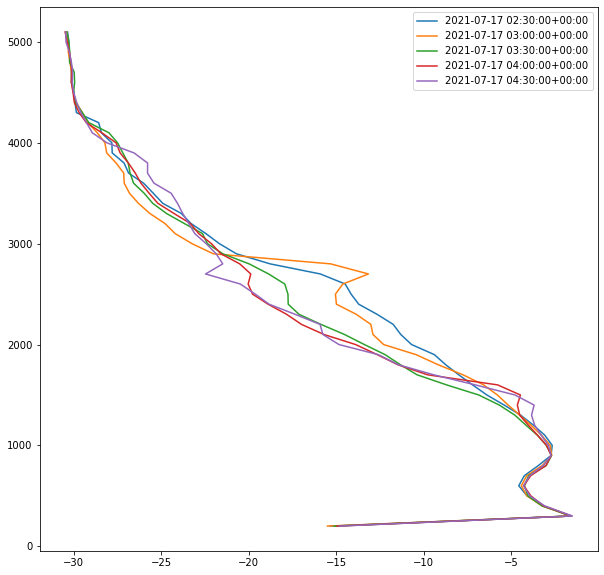

In [142]:
plt.figure(figsize=(10,10))
plt.plot(corrected_cnr[corrected_cnr.columns[5:10]].values, corrected_cnr.index, label =corrected_cnr.columns[5:10])
plt.legend()
plt.show()

In [122]:
corrected_cnr_= corrected_cnr.T

In [123]:
corrected_cnr_

,200,300,400,500,600,700,800,900,1000,1100,...,4200,4300,4400,4500,4600,4700,4800,4900,5000,5100
time,,,,,,,,,,,,,,,,,,,,,
2021-07-17 00:00:00+00:00,-30.364986,-30.331981,-30.262873,-30.123139,-29.877395,-29.047027,-27.952505,-27.436064,-27.064216,-26.905795,...,-4.954054,-4.924969,-5.036195,-5.203594,-5.228862,-4.922025,-4.327160,-3.309493,-1.637125,-15.868083
2021-07-17 00:30:00+00:00,-30.362857,-30.305485,-30.219299,-30.204252,-29.892151,-28.695133,-27.059925,-26.983599,-27.386734,-27.256324,...,-4.329725,-4.236249,-4.372074,-4.685320,-4.857348,-4.655370,-4.114975,-3.101677,-1.506179,-15.222236
2021-07-17 01:00:00+00:00,-30.334292,-30.365389,-30.241035,-30.177044,-30.168601,-29.881866,-29.010518,-27.311894,-27.215841,-27.969123,...,-3.811965,-3.736018,-3.908330,-4.338305,-4.679011,-4.702488,-4.307035,-3.307872,-1.617515,-15.581000
2021-07-17 01:30:00+00:00,-30.500477,-30.376845,-30.307917,-30.229648,-30.049506,-30.072376,-29.732478,-29.018795,-28.530596,-28.681721,...,-3.545154,-3.439369,-3.610028,-4.075977,-4.588031,-4.773395,-4.460235,-3.445278,-1.685807,-16.007583
2021-07-17 02:00:00+00:00,-30.358267,-30.328102,-30.128638,-30.183613,-30.094348,-30.101158,-29.931810,-29.708313,-28.907700,-28.507546,...,-2.972603,-2.884756,-3.120709,-3.642859,-4.151786,-4.311864,-4.190315,-3.443153,-1.685514,-15.587750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-13 21:30:00+00:00,-30.398448,-30.398464,-30.314830,-30.306743,-30.202278,-30.266621,-30.062064,-29.995859,-29.977164,-29.832918,...,-21.985726,-19.515431,-5.719313,4.990211,5.541964,2.257957,-0.772090,-1.484872,-0.904207,-10.013861
2021-10-13 22:00:00+00:00,-30.383569,-30.311834,-30.276991,-30.244511,-30.153761,-30.150353,-30.091480,-29.990246,-30.033057,-29.824996,...,-20.529909,-11.033075,2.392821,5.852652,3.621754,2.036557,-0.957345,-1.499830,-0.958482,-10.408220
2021-10-13 22:30:00+00:00,-30.462527,-30.357222,-30.293234,-30.241894,-30.204799,-30.107372,-29.995168,-29.882508,-29.979929,-29.833396,...,-10.453956,10.527956,11.959621,-0.304875,-2.430626,-2.655901,-2.242240,-1.679361,-0.967323,-10.797764
